In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.metrics import f1_score,accuracy_score,precision_score,confusion_matrix
from sklearn.metrics import recall_score,classification_report,RocCurveDisplay,roc_curve

In [4]:
data = pd.read_csv("tae.csv file new 6.0.csv")

data.head()

,Language,Course instructor,Course,Semester,Class size,Class Attribute
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


In [5]:
print(data.describe())

         Language  Course instructor      Course    Semester  Class size  \
count  151.000000         151.000000  151.000000  151.000000  151.000000   
mean     1.807947          13.642384    8.105960    1.847682   27.867550   
std      0.395225           6.825779    7.023914    0.360525   12.893758   
min      1.000000           1.000000    1.000000    1.000000    3.000000   
25%      2.000000           8.000000    3.000000    2.000000   19.000000   
50%      2.000000          13.000000    4.000000    2.000000   27.000000   
75%      2.000000          20.000000   15.000000    2.000000   37.000000   
max      2.000000          25.000000   26.000000    2.000000   66.000000   

       Class Attribute  
count       151.000000  
mean          2.019868  
std           0.820327  
min           1.000000  
25%           1.000000  
50%           2.000000  
75%           3.000000  
max           3.000000  


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Language           151 non-null    int64
 1   Course instructor  151 non-null    int64
 2   Course             151 non-null    int64
 3   Semester           151 non-null    int64
 4   Class size         151 non-null    int64
 5   Class Attribute    151 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB
None


In [7]:
data.head(10)

,Language,Course instructor,Course,Semester,Class size,Class Attribute
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3
5,2,23,3,1,20,3
6,2,9,5,2,19,3
7,2,10,3,2,27,3
8,1,22,3,1,58,3
9,2,15,3,1,20,3


In [8]:
data.tail(10)

,Language,Course instructor,Course,Semester,Class size,Class Attribute
141,2,17,18,2,29,1
142,2,16,20,2,15,1
143,2,3,2,2,37,1
144,2,19,4,2,10,1
145,2,23,3,2,24,1
146,2,3,2,2,26,1
147,2,10,3,2,12,1
148,1,18,7,2,48,1
149,2,22,1,2,51,1
150,2,2,10,2,27,1


In [9]:
data.Language.value_counts()

2    122
1     29
Name: Language, dtype: int64

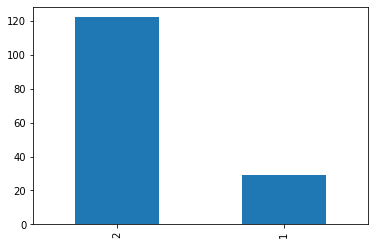

In [10]:
data.Language.value_counts().plot(kind="bar");

In [11]:
X = data.drop("Language", axis=1) 

y = data.Language

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()

model.fit(x_train,y_train)

model.score(x_test, y_test)

0.8709677419354839

##  DecisionTreeClassifier

In [13]:
decision_tree = DecisionTreeClassifier()

decision_tree.fit(x_train,y_train)

decision_tree.score(x_test, y_test)

0.8064516129032258

## KNeighborsClassifier

In [14]:
KNN = KNeighborsClassifier()

KNN.fit(x_train,y_train)

KNN.score(x_test, y_test)

0.7741935483870968

## RandomForestRegressor

In [15]:
rf_regressor = RandomForestRegressor()

rf_regressor.fit(x_train,y_train)

rf_regressor.score(x_test, y_test)

0.17920881734315952

## Correlation Matrix

In [16]:
data.corr()

,Language,Course instructor,Course,Semester,Class size,Class Attribute
Language,1.000000,-0.250510,0.134660,0.214417,-0.151547,-0.255466
Course instructor,-0.250510,1.000000,-0.236010,-0.168573,-0.035765,0.075095
Course,0.134660,-0.236010,1.000000,0.224927,-0.033485,0.143103
Semester,0.214417,-0.168573,0.224927,1.000000,0.269554,-0.282742
Class size,-0.151547,-0.035765,-0.033485,0.269554,1.000000,-0.035676
Class Attribute,-0.255466,0.075095,0.143103,-0.282742,-0.035676,1.000000


## Visualization of Correlation Matrix

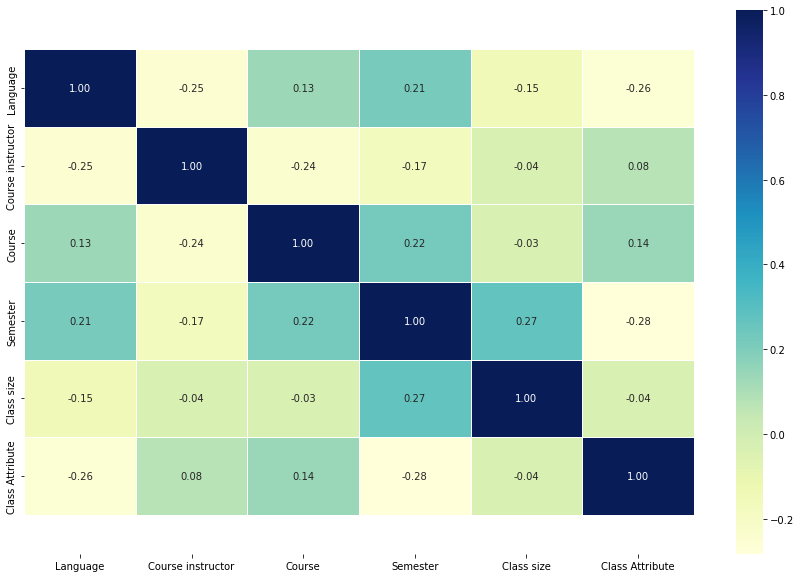

In [17]:
corr_matrix = data.corr()

fig, ax = plt.subplots(figsize=(15,10))

ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,
                fmt=".2f",cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

## Data Models Training and Models


In [18]:
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest Classifier": RandomForestClassifier(),
          "Decision Tree": DecisionTreeClassifier(),
          "Random Forest Regression": RandomForestRegressor()
         }

def fit_and_score(models, x_train,x_test,y_train,y_test):
    
    np.random.seed(42)
    
    model_scores = {}
    
    for name, model in models.items():
        
        model.fit(x_train, y_train)
        
        model_scores[name] = model.score(x_test,y_test)
        
    return model_scores

In [19]:
model_scores = fit_and_score(models = models,
                             x_train = x_train,
                             x_test = x_test,
                             y_train = y_train,
                             y_test = y_test)

model_scores

{'Logistic Regression': 0.8709677419354839,
 'KNN': 0.7741935483870968,
 'Random Forest Classifier': 0.8709677419354839,
 'Decision Tree': 0.8064516129032258,
 'Random Forest Regression': 0.18481322252078614}

## Visualization and Comparision of Different Data Models Accuracy

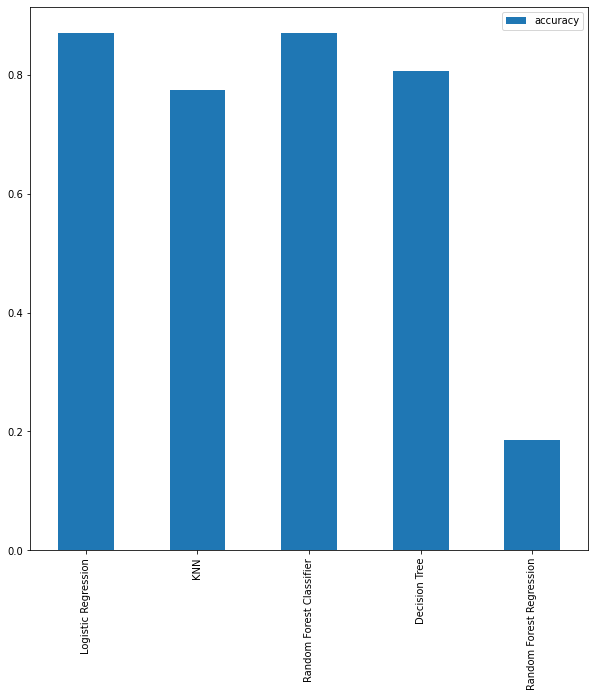

In [20]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])

model_compare.T.plot.bar(figsize=(10,10));

## RandomForestClassifier Evaluation

In [21]:
rf_classifier = RandomForestClassifier()

rf_classifier.fit(x_train, y_train)

y_pred = rf_classifier.predict(x_test)

classification_report = classification_report(y_test,y_pred)

print(classification_report)

              precision    recall  f1-score   support

           1       1.00      0.33      0.50         6
           2       0.86      1.00      0.93        25

    accuracy                           0.87        31
   macro avg       0.93      0.67      0.71        31
weighted avg       0.89      0.87      0.84        31



In [22]:
print(f"Accuracy : {accuracy_score(y_test,y_pred)*100:.2f}%")
print(f"Precision : {precision_score(y_test,y_pred)*100:.2f}%")
print(f"Recall : {recall_score(y_test,y_pred)*100:.2f}%")
print(f"F1 : {f1_score(y_test,y_pred)*100:.2f}%")

Accuracy : 87.10%
Precision : 100.00%
Recall : 33.33%
F1 : 50.00%


## DecisionTreeClassifier Evaluation

In [23]:
decision_tree = DecisionTreeClassifier()

decision_tree.fit(x_train, y_train)

y_pred = decision_tree.predict(x_test)

In [24]:
print(f"Accuracy : {accuracy_score(y_test,y_pred)*100:.2f}%")
print(f"Precision : {precision_score(y_test,y_pred)*100:.2f}%")
print(f"Recall : {recall_score(y_test,y_pred)*100:.2f}%")
print(f"F1 : {f1_score(y_test,y_pred)*100:.2f}%")

Accuracy : 80.65%
Precision : 50.00%
Recall : 50.00%
F1 : 50.00%


##  KNeighborsClassifier and Evaluation

In [25]:
knn = KNeighborsClassifier()

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

In [26]:
print(f"Accuracy : {accuracy_score(y_test,y_pred)*100:.2f}%")
print(f"Precision : {precision_score(y_test,y_pred)*100:.2f}%")
print(f"Recall : {recall_score(y_test,y_pred)*100:.2f}%")
print(f"F1 : {f1_score(y_test,y_pred)*100:.2f}%")

Accuracy : 77.42%
Precision : 33.33%
Recall : 16.67%
F1 : 22.22%


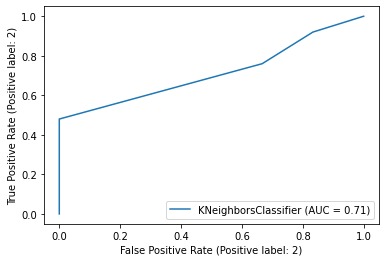

In [27]:
RocCurveDisplay.from_estimator(knn, x_test, y_test);

In [28]:
conf_mat = confusion_matrix(y_test,y_pred)

conf_mat

array([[ 1,  5],
       [ 2, 23]], dtype=int64)

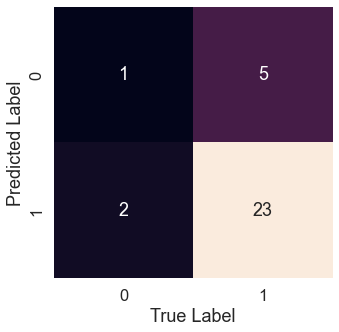

In [29]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test, y_pred):
    
    fig, ax = plt.subplots(figsize = (5,5))
    
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                     annot = True,
                     cbar = False)
    
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    
plot_conf_mat(y_test, y_pred)